# import the necessary libraries


In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import os
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Load the datasets
df=pd.read_csv("air_quality_health_impact_data.csv")
df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


## Essential Expolatory Data Analysis(EDA)


In [31]:
# Statistical Describe
print(df.info())
# Descriptive Statistics
print("\n summary statistics:")
print(df.describe().T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [33]:
# Check for missing vales
df.isnull().sum()

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

## Visualisations

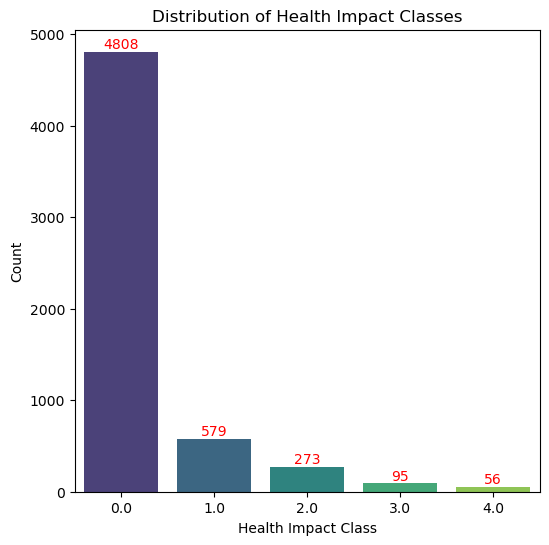

In [96]:
plt.figure(figsize=(6,6))
xz = sns.countplot(x='HealthImpactClass', data=df, palette='viridis')
plt.title('Distribution of Health Impact Classes')
plt.xlabel('Health Impact Class')
plt.ylabel('Count')

#add count annotations on the top of the bars
for bar in xz.containers:
   xz.bar_label(bar, label_type='edge', fontsize=10, color='red')
plt.show()    
    


## Correlation matrix using Heatmap of Pollutants and Health Impact

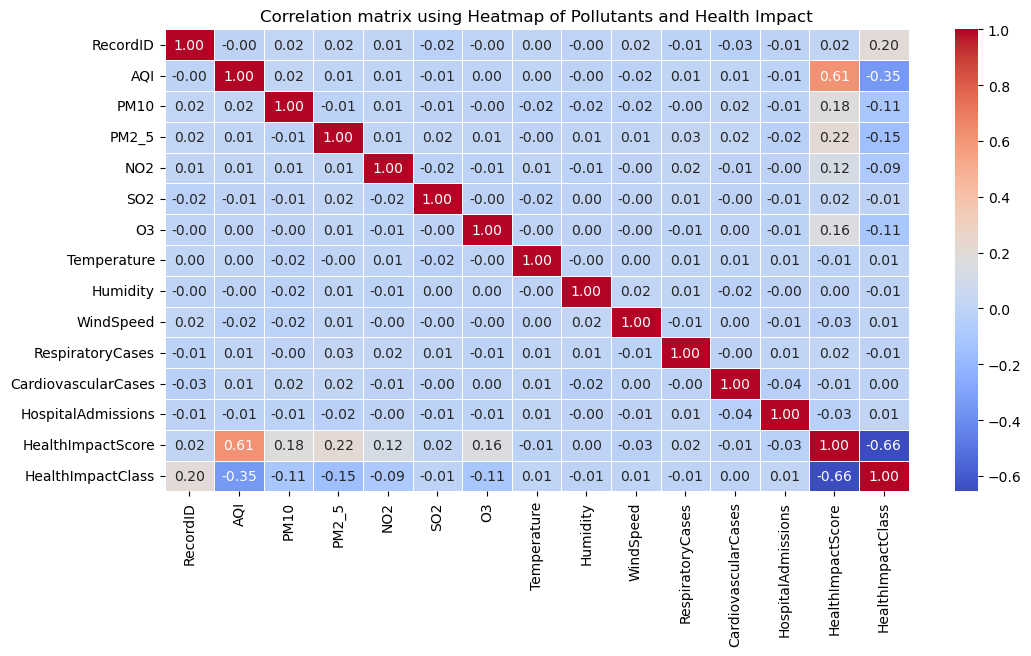

In [102]:
plt.figure(figsize=(12, 6))
c= df.corr()
sns.heatmap(c,annot=True,cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix using Heatmap of Pollutants and Health Impact")
plt.show()

## Pollutant Concentration vs. Hospitalization Rate

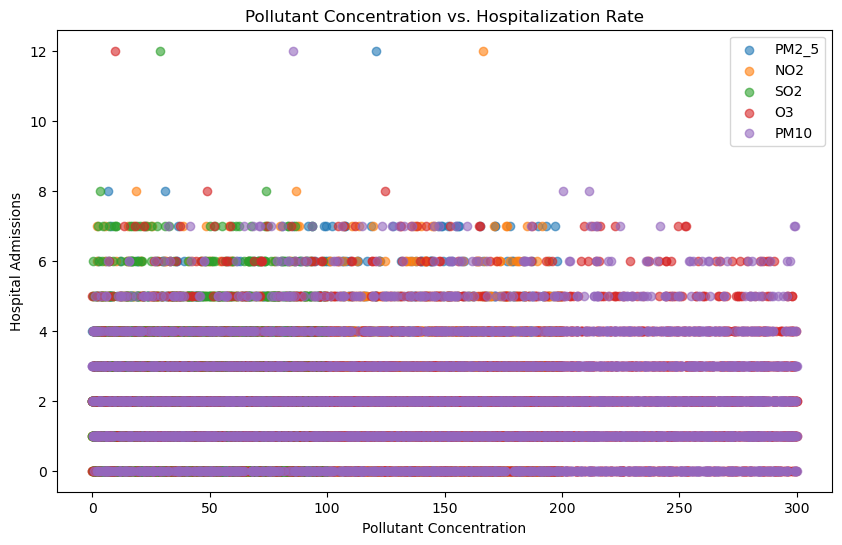

In [113]:
plt.figure(figsize=(10, 6))
[plt.scatter(df[p], df["HospitalAdmissions"], label=p, alpha=0.6) for p in ["PM2_5", "NO2", "SO2", "O3", "PM10"]]
plt.xlabel("Pollutant Concentration")
plt.ylabel("Hospital Admissions")
plt.title("Pollutant Concentration vs. Hospitalization Rate")
plt.legend()
plt.show()



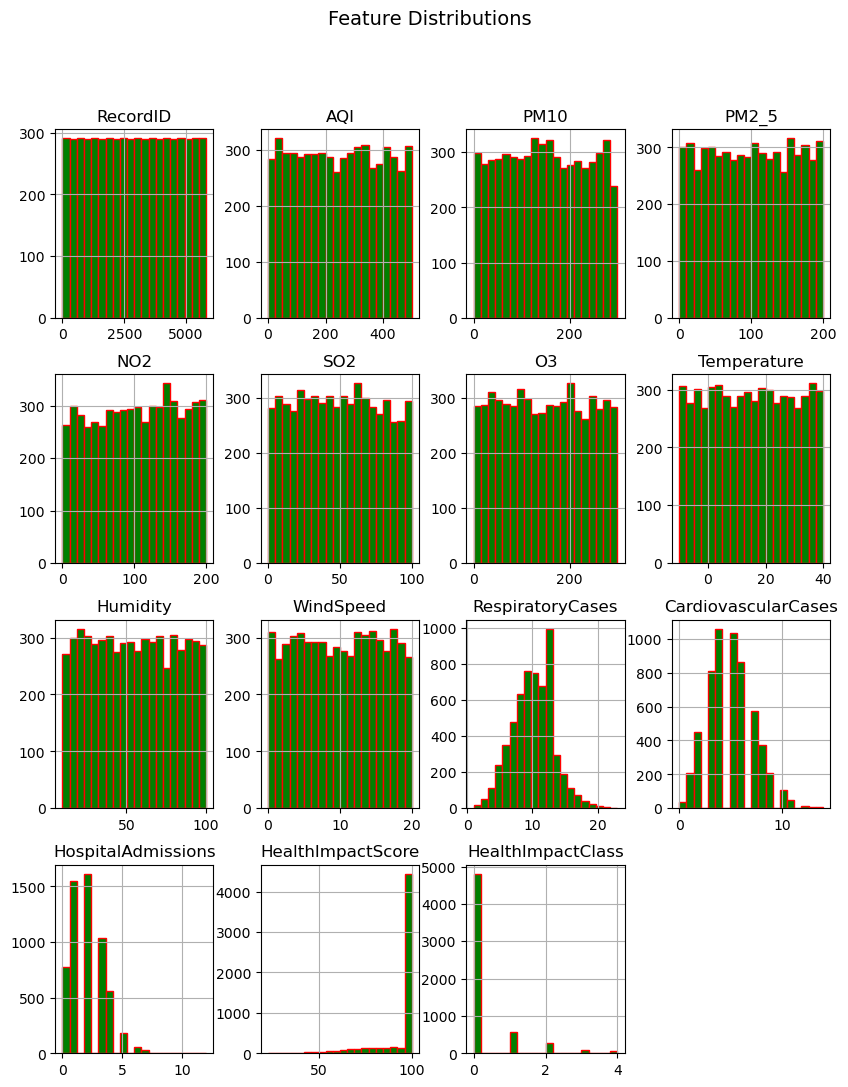

In [131]:
# Histogram feature distribution
df.hist(figsize=(10,12), bins=20,color="green", edgecolor="red")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

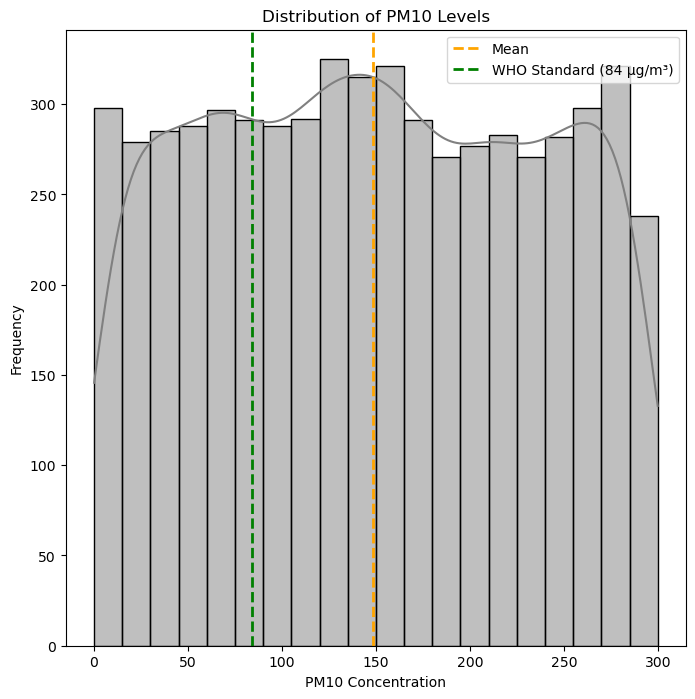

In [187]:
# Histogram plot of level of P.M10
plt.figure(figsize=(8, 8))

# Use seaborn histplot to add kde
sns.histplot(df["PM10"], bins=20, kde=True,color="grey", edgecolor="black")

# Add vertical lines
plt.axvline(df["PM10"].mean(), color="orange", linestyle="dashed", linewidth=2, label="Mean")#This calculates the mean (average) of the PM2_5 values from your dataset. The vertical line will be drawn at the location of this mean.
plt.axvline(84, color="green", linestyle="dashed", linewidth=2, label="WHO Standard (84 µg/m³)")#This adds another vertical line, but this time at the position 35, representing a PM2.5 concentration of 35 µg/m³.

# Labels and title
plt.xlabel("PM10 Concentration")
plt.ylabel("Frequency")
plt.title("Distribution of PM10 Levels")
plt.legend()

plt.show()


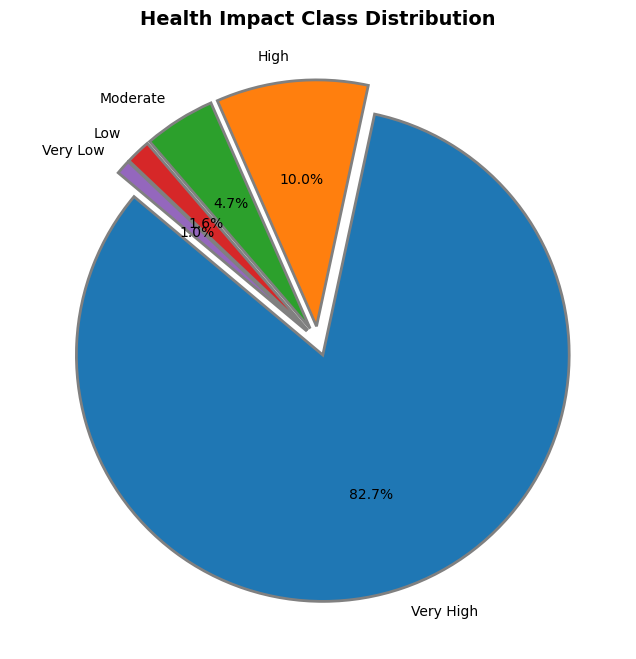

In [209]:
# Step 1: Prepare data
health_counts = df['HealthImpactClass'].value_counts()
categories = ['Very High', 'High', 'Moderate', 'Low', 'Very Low']

# Step 2: Pie Chart
fig, xz = plt.subplots(figsize=(8, 8))

explode = [0.06] * len(categories)  # Slightly explode all slices

# Draw pie
wedges, texts, autotexts = xz.pie(
  health_counts,
    labels=categories,
    autopct='%1.1f%%',
    explode=explode,
    startangle=140,
    textprops={'fontsize': 10, 'color': 'black'},
    wedgeprops={'edgecolor': 'grey', 'linewidth':2}
)

# Step 3: Improve title
plt.title('Health Impact Class Distribution', fontsize=14, fontweight='bold')

plt.show()

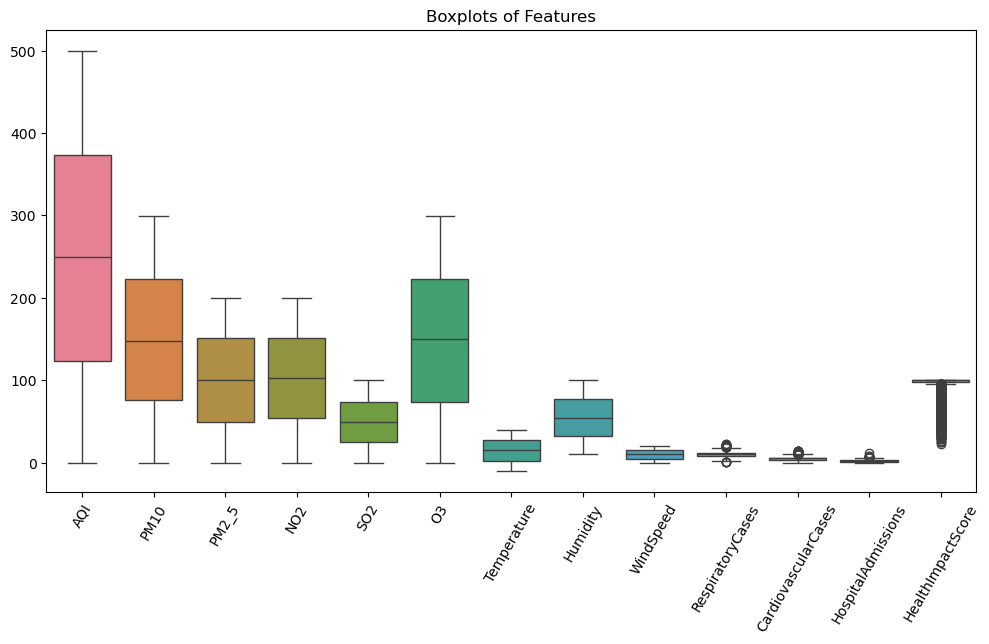

In [203]:
# Boxplot feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['RecordID', 'HealthImpactClass']))
plt.xticks(rotation=60)
plt.title("Boxplots of Features")
plt.show()

## Data preprocessing

In [240]:
# features & Target
X=df.drop(['RecordID','HealthImpactClass'],axis=1)
y=df['HealthImpactClass']

In [218]:
X.head()

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactClass
0,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,0.0
1,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,0.0
2,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,0.0
3,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,0.0
4,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,0.0


In [260]:
# split the data into training & testing sets
X_train,y_train,X_test,y_train=train_test_split(X,y,test_size=0.3,random_state=42)

## Building a model using RandomForestAlgorithm

In [276]:
# craete & train the Random Forest Model
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [278]:
# Make predictions
y_pred=rf_model.predict(X_test)



In [286]:
#Evaluate the accuracy of the model
accuracy=accuracy_score(y_test,y_pred) #y_test is actual value & y_pred is predicted value
print(f"Accuracy:{accuracy*100:.2f}%")

Accuracy:95.79%


In [292]:
# print classification report
print("\nClassification Report:")
print(classification_report(y_test,y_pred))



Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       953
         1.0       0.92      0.91      0.91       124
         2.0       0.81      0.81      0.81        53
         3.0       0.80      0.40      0.53        20
         4.0       0.00      0.00      0.00        13

    accuracy                           0.96      1163
   macro avg       0.70      0.62      0.65      1163
weighted avg       0.95      0.96      0.95      1163



In [300]:
# print confusion matrix
print("\nconfusion matrix:")
print(confusion_matrix(y_test,y_pred))


confusion matrix:
[[950   0   2   1   0]
 [  2 113   5   1   3]
 [  8   2  43   0   0]
 [  5   3   1   8   3]
 [  6   5   2   0   0]]


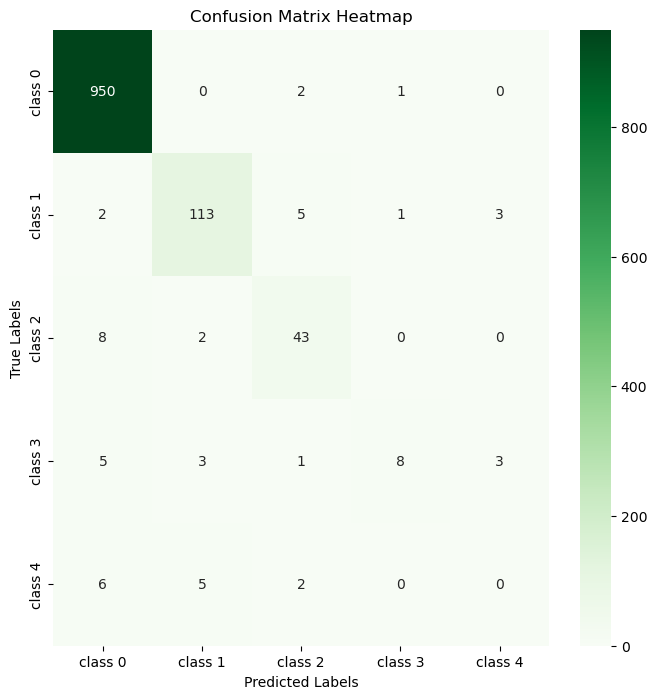

In [318]:
#Plot Confusion Matrix Heatmap
# 1. Your confusion matrix
cm = [[950, 0, 2, 1, 0],
      [2, 113, 5, 1, 3],
      [8, 2, 43, 0, 0],
      [5, 3, 1, 8, 3],
      [6, 5, 2, 0, 0]]
# 2. Labels for the classes
labels=["class 0","class 1","class 2","class 3","class 4"]
# 3. Plot the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens", xticklabels=labels, yticklabels=labels)
# 4. Titles and labels
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

#The Random Forest model effectively predicts health impact classes based on pollution data, with strong results for major classes. Some misclassifications were observed in smaller classes due to class imbalance, which can be improved with resampling techniques. High pollution levels often exceed WHO standards, highlighting air quality issues. The confusion matrix heatmap helped identify areas for improvement in the model. Future work involves addressing class imbalance, tuning model parameters, and trying other algorithms to improve accuracy.